# Tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, classification_report

# Load the Feature selected Dataset 

In [3]:
df = pd.read_csv("heart_diseases_final.csv")  

# Feaatures & target
X = df.drop(columns=['target'])
y = df['target']

# Supervised Learning - Classification Models
Steps:
1. Split the dataset into training (80%) and testing (20%) sets.
2. Train the following models:
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * Support Vector Machine (SVM)
3. Evaluate models using:
    * Accuracy, Precision, Recall, F1-score
    * ROC Curve & AUC Score

* Dataset split into 80% training and 20% testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set  size:", X_test.shape)

Training set size: (242, 15)
Testing set  size: (61, 15)


* Model Training & Evaluation

In [5]:
# Models initialised
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)    # probability=True for ROC/AUC
}

results = {}

# Training and Evaluation loop
print("----Training Supervised Learning Models (Classification)🤖----")
for name, model in models.items():
    # Training models
    print(f"\n🔵 {name} model:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]  # probability for ROC-AUC
    
    # Evaluating models using performance Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Evaluating models using ROC & AUC scoring
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    results[name] = [acc, prec, rec, f1, roc_auc]
    print(classification_report(y_test, y_pred))

# Tabular format for easy models comparison
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "AUC-score"])
print("\nModel Performance Summary:")
display(results_df)

----Training Supervised Learning Models (Classification)🤖----

🔵 Logistic Regression model:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61


🔵 Decision Tree model:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.72      0.82      0.77        28

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61


🔵 Random Forest model:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.8

,Logistic Regression,Decision Tree,Random Forest,SVM
Accuracy,0.885246,0.770492,0.852459,0.918033
Precision,0.818182,0.718750,0.827586,0.870968
Recall,0.964286,0.821429,0.857143,0.964286
F1-score,0.885246,0.766667,0.842105,0.915254
AUC-score,0.959957,0.774351,0.945887,0.961039


* ROC Curves & AUC scores

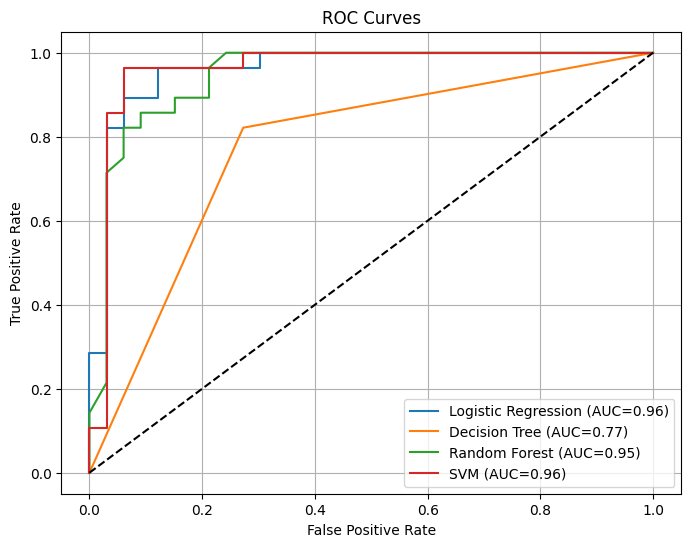

In [6]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.grid()
plt.legend()
plt.show()